In [ ]:
import numpy as np 
import keras,os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = 224
classes = 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive'

MyDrive


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/datasets/datasets kendaraan/training'
test_path = '/content/drive/MyDrive/datasets/datasets kendaraan/testing'

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
          '/content/drive/MyDrive/datasets/datasets kendaraan/training',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 511 images belonging to 2 classes.


In [ ]:
class_name = list(train_generator.class_indices.keys())
class_name

['car', 'motorcycle']

In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range= 5,
        width_shift_range= 0.1,
        height_shift_range= 0.1, 
        horizontal_flip= True,
        fill_mode= "nearest")

test_generator = test_datagen.flow_from_directory(
          '/content/drive/MyDrive/datasets/datasets kendaraan/testing',
        target_size= (IMAGE_SIZE, IMAGE_SIZE), class_mode="sparse")

Found 6 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
train_data = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 511 images belonging to 2 classes.


In [ ]:
test_data = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6 images belonging to 2 classes.


In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=10,generator=train_data, validation_data= test_data, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

<ipython-input-18-085a1c0ca4f3>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=10,generator=train_data, validation_data= test_data, validation_steps=10,epochs=10,callbacks=[checkpoint,early])


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.7618 - accuracy: 0.4796  

10/10 [==============================] - 759s 75s/step - loss: 0.7618 - accuracy: 0.4796 - val_loss: 0.6876 - val_accuracy: 0.6667
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.5047  

10/10 [==============================] - 745s 75s/step - loss: 0.6947 - accuracy: 0.5047
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5219  

10/10 [==============================] - 749s 75s/step - loss: 0.6933 - accuracy: 0.5219
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4639  

10/10 [==============================] - 722s 72s/step - loss: 0.6939 - accuracy: 0.4639
Epoch 5/10
10/10 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5392  

10/10 [==============================] - 705s 70s/step - loss: 0.6920 - accuracy: 0.5392
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5455  

10/10 [==============================] - 715s 72s/step - loss: 0.6924 - accuracy: 0.5455
Epoch 7/10
10/10 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.4828  

10/10 [==============================] - 705s 70s/step - loss: 0.6961 - accuracy: 0.4828
Epoch 8/10
10/10 [==============================] - ETA: 0s - loss: 0.6942 - accuracy: 0.4812  

10/10 [==============================] - 714s 71s/step - loss: 0.6942 - accuracy: 0.4812
Epoch 9/10
10/10 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.4890  

10/10 [==============================] - 708s 71s/step - loss: 0.6941 - accuracy: 0.4890
Epoch 10/10
10/10 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5110  

10/10 [==============================] - 709s 71s/step - loss: 0.6931 - accuracy: 0.5110


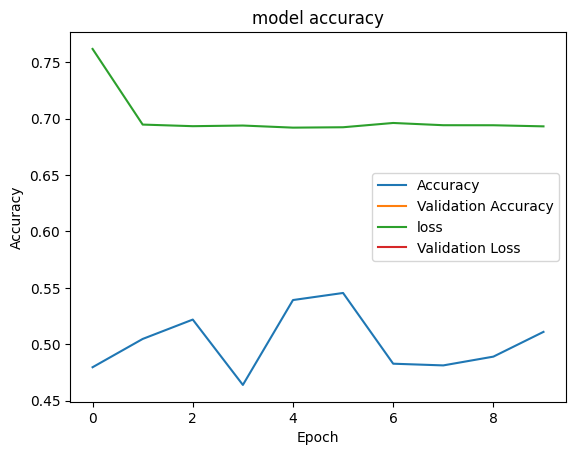

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [20]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 1s 1s/step


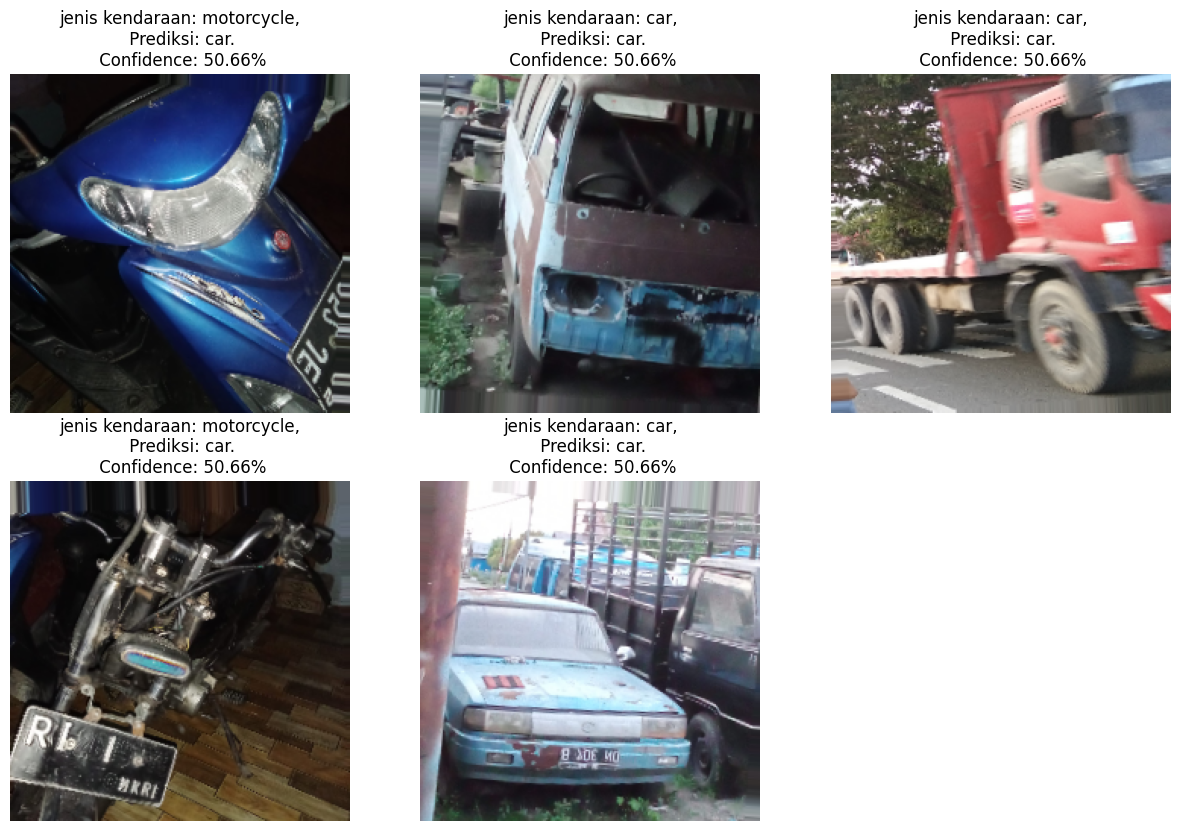

In [21]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        plt.title(f"jenis kendaraan: {actual_class},\n Prediksi: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break

In [22]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/datasets/datasets kendaraan/saved models 2/model_vgg16.h5')